# Jenny Yang

## Research question/interests
I will research on how to set up appropriate goals for different types of projects to maintain high success rate.

* Is the difference between goal and pledged amount hugh for each category?
* Does the differencee between goals and pledged amount vary across each category?

In [2]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/raw/ks-projects-201801.csv')
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


## Task 1: Conduct an Exploratory Data Analysis (EDA) on dataset

In [4]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
df.nunique(axis=0)

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64

In [7]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.000000,378661.000000,378661.000000,378661.000000,374864.000000,378661.000000,378661.000000
mean,1074731191.988755,49080.791521,9682.979339,105.617476,7036.728867,9058.924074,45454.401465
std,619086204.322627,1183391.259093,95636.010005,907.185035,78639.745308,90973.343107,1152950.055088
min,5971.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,538263516.000000,2000.000000,30.000000,2.000000,16.980000,31.000000,2000.000000
50%,1075275634.000000,5200.000000,620.000000,12.000000,394.720000,624.330000,5500.000000
75%,1610148624.000000,16000.000000,4076.000000,56.000000,3034.090000,4050.000000,15500.000000
max,2147476221.000000,100000000.000000,20338986.270000,219382.000000,20338986.270000,20338986.270000,166361390.710000


In [8]:
#identify all main category we have
df.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

### conduct plots of rough data

<AxesSubplot:xlabel='usd_goal_real', ylabel='usd_pledged_real'>

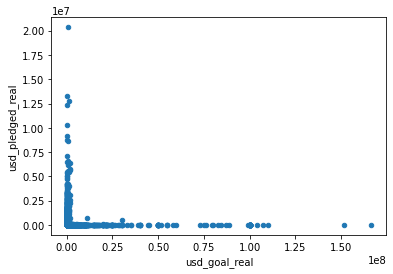

In [9]:
df.plot(kind='scatter', x='usd_goal_real', y='usd_pledged_real')

From a very rough scatter plot analyze the overall relationship between the goal and amount pledged in USD, we can clearly see there ls no linear relationship between these two, which means higher goals set does not necessarily raise more funds.

<AxesSubplot:>

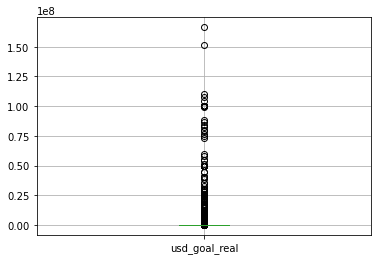

In [10]:
df.boxplot('usd_goal_real')

<AxesSubplot:>

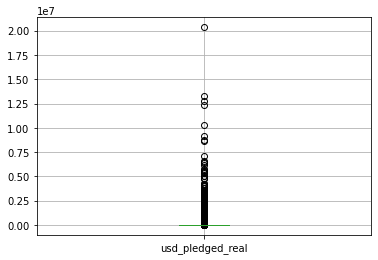

In [11]:
df.boxplot('usd_pledged_real')

From the boxsplots of both pledged amount and goal amount above, we can also clearly see that most people set low amount goals, and the funds raised are also low. Though there are still some outliers with high amount.

In [12]:
df.main_category.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

To look at the frequency of each main category, film and video counts for the most and least people are under the category "Dance"

## Task2: Analysis Pipeline

In [13]:
#make a copy of necessary index
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop(['ID','name','category','currency','deadline','launched','backers','pledged','goal','usd pledged','country'],
axis=1)
df_cleaned = df_cleaned.drop(df_cleaned[(df_cleaned.state != 'successful') & (df_cleaned.state != 'failed')].index)
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned = df_cleaned.assign(Amtdiff = df_cleaned.usd_pledged_real - df_cleaned.usd_goal_real)
df_cleaned = df_cleaned.fillna({'Amtdiff':0})

In [14]:
df_cleaned

,main_category,state,usd_pledged_real,usd_goal_real,Amtdiff
0,Publishing,failed,0.0,1533.95,-1533.95
1,Film & Video,failed,2421.0,30000.00,-27579.00
2,Film & Video,failed,220.0,45000.00,-44780.00
3,Music,failed,1.0,5000.00,-4999.00
4,Food,successful,52375.0,50000.00,2375.00
...,...,...,...,...,...
331670,Food,failed,154.0,6500.00,-6346.00
331671,Film & Video,failed,155.0,1500.00,-1345.00
331672,Film & Video,failed,20.0,15000.00,-14980.00
331673,Technology,failed,200.0,15000.00,-14800.00


In [15]:
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,usd_pledged_real,usd_goal_real,Amtdiff
count,331675.000000,331675.000000,331675.000000
mean,9943.461256,41510.001543,-31566.540287
std,96732.934175,1108929.663087,1112528.201669
min,0.000000,0.010000,-166361390.710000
25%,50.000000,2000.000000,-9213.190000
50%,788.000000,5000.000000,-1262.620000
75%,4608.000000,15000.000000,298.000000
max,20338986.270000,166361390.710000,19838986.270000


In [16]:
df_cleaned = df_cleaned.rename(columns={'main_category': 'Category','state': 'Success','usd_pledged_real': 'Pledged', 'usd_goal_real': 'Goal', 'Amtdiff': 'Amount Difference'})
df_cleaned.head()

,Category,Success,Pledged,Goal,Amount Difference
0,Publishing,failed,0.0,1533.95,-1533.95
1,Film & Video,failed,2421.0,30000.00,-27579.00
2,Film & Video,failed,220.0,45000.00,-44780.00
3,Music,failed,1.0,5000.00,-4999.00
4,Food,successful,52375.0,50000.00,2375.00


In [17]:
df_cleaned = df_cleaned[df_cleaned['Pledged'].between(0, 20000000)]
df_cleaned = df_cleaned[df_cleaned['Goal'].between(0, 10000000)]
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Pledged,Goal,Amount Difference
count,331563.000000,331563.000000,331563.000000
mean,9881.242414,25529.666058,-15648.423644
std,90064.932748,187362.021729,204374.836378
min,0.000000,0.010000,-10000000.000000
25%,50.000000,2000.000000,-9195.000000
50%,790.000000,5000.000000,-1257.000000
75%,4610.000000,15000.000000,298.955000
max,13285226.360000,10000000.000000,13235226.360000


In [18]:
df_cleaned.head()

,Category,Success,Pledged,Goal,Amount Difference
0,Publishing,failed,0.0,1533.95,-1533.95
1,Film & Video,failed,2421.0,30000.00,-27579.00
2,Film & Video,failed,220.0,45000.00,-44780.00
3,Music,failed,1.0,5000.00,-4999.00
4,Food,successful,52375.0,50000.00,2375.00


## Task 3: Method Chaining

In [19]:
import function2 as p2
task3 = p2.load_and_process('../data/raw/ks-projects-201801.csv')
task3

,Category,Success,Pledged,Goal,Amount Difference
0,Publishing,failed,0.0,1533.95,-1533.95
1,Film & Video,failed,2421.0,30000.00,-27579.00
2,Film & Video,failed,220.0,45000.00,-44780.00
3,Music,failed,1.0,5000.00,-4999.00
4,Food,successful,52375.0,50000.00,2375.00
...,...,...,...,...,...
331670,Food,failed,154.0,6500.00,-6346.00
331671,Film & Video,failed,155.0,1500.00,-1345.00
331672,Film & Video,failed,20.0,15000.00,-14980.00
331673,Technology,failed,200.0,15000.00,-14800.00


## Task 4: Analysis

In [20]:
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Pledged,Goal,Amount Difference
count,331563.000000,331563.000000,331563.000000
mean,9881.242414,25529.666058,-15648.423644
std,90064.932748,187362.021729,204374.836378
min,0.000000,0.010000,-10000000.000000
25%,50.000000,2000.000000,-9195.000000
50%,790.000000,5000.000000,-1257.000000
75%,4610.000000,15000.000000,298.955000
max,13285226.360000,10000000.000000,13235226.360000


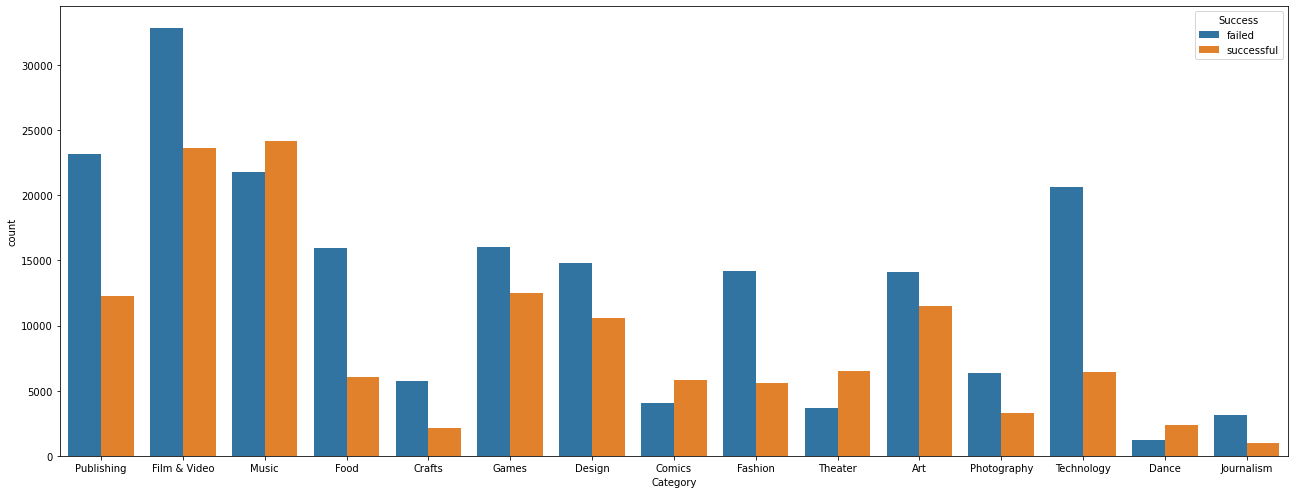

In [21]:
fig, ax = plt.subplots()
catcountplot = sns.countplot(x='Category', data=df_cleaned, hue='Success')
fig.set_size_inches(22, 8.27)

Among categories, Film & Video and Music have the most success. Music, Comics Category, Theater and Dance have more success than fail.

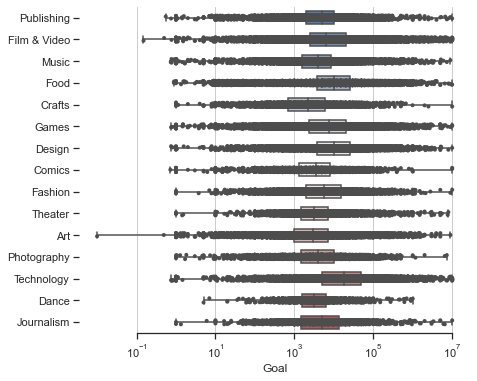

In [22]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")
sns.boxplot(x="Goal", y="Category", data=df_cleaned,
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="Goal", y="Category", data=df_cleaned,
              size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Above is a comaprison of the goals set for each category. All categories tend to set their goal within similar ranges, but technology overall has higher goals set. crafts and arts tend to have lower goals.

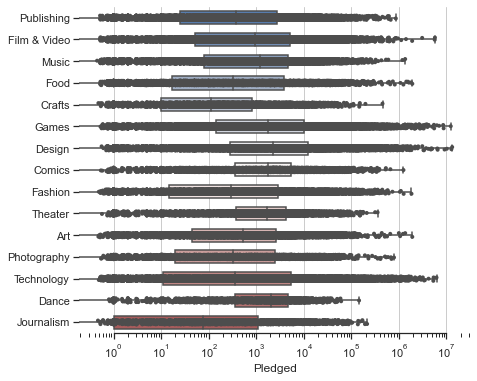

In [23]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")
sns.boxplot(x="Pledged", y="Category", data=df_cleaned,
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="Pledged", y="Category", data=df_cleaned,
              size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Above is a comparison of the amount pledged for each category. Different from the goal plot, each of them tend to have similar higher boundary. Yet the lower boundary is differet across different categories. Journalism tend to have the lowest pledged amount. Games and Designs tend to have the higest higher boundaries.

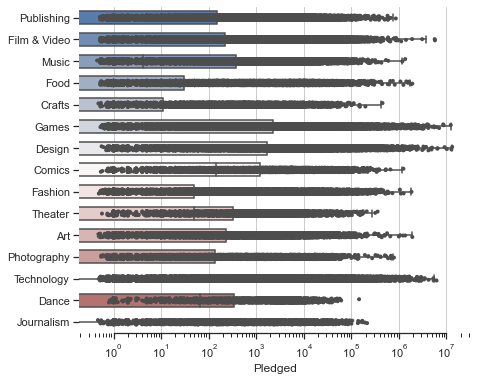

In [24]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")
sns.boxplot(x="Amount Difference", y="Category", data=df_cleaned,
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="Pledged", y="Category", data=df_cleaned,
              size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

While we look at the amount difference between pledged amount and the goals, Games, Design and Comics are more likely to raise more compared to other categories. Crafts and Food tend to receive similar amount compared to their goals setted. 

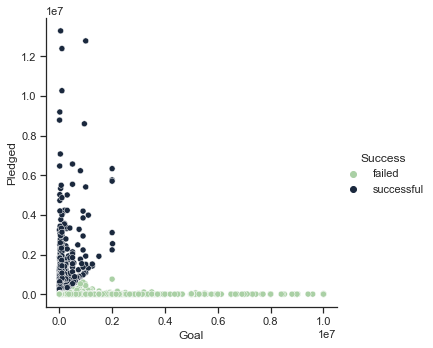

In [25]:
sns.relplot(x="Goal", y="Pledged", hue="Success", palette="ch:r=-.5,l=.75", data=df_cleaned);

To look at the differene between goals and pledged amount, we can clearly see that a lower goal is more likely to raise more tha expected. On contrast, making a unreliable high goal will result in low amount raised and a fail.

In [26]:
df_cleaned.to_csv('modified2.csv')

In [27]:
df_success = df_cleaned.drop(df_cleaned[(df_cleaned.Success != 'successful') ].index)
df_success = df_success.reset_index(drop=True)
df_success.to_csv('modified2_success.csv')